In [58]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')


In [9]:
df=pd.read_csv('application_train.csv').dropna(subset =['CODE_GENDER'])
df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Exploratory Analysis

In [101]:
df.shape

(307511, 122)

#### This is a high dimensional dataset

In [12]:

df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [104]:
df.info

<bound method DataFrame.info of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0        

In [108]:
df.isna().sum() # There are a lot of missing values

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [109]:
default=df.loc[df.TARGET==1]
non_default=df.loc[df.TARGET==0]

In [112]:
print(default['AMT_INCOME_TOTAL'].describe())
print(non_default['AMT_INCOME_TOTAL'].describe())


count    2.482500e+04
mean     1.656118e+05
std      7.466770e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.350000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64
count    2.826860e+05
mean     1.690777e+05
std      1.104763e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.485000e+05
75%      2.025000e+05
max      1.800009e+07
Name: AMT_INCOME_TOTAL, dtype: float64


- STD for default is significantly larger than non default which means income for default is more speared out
- Mean of total income for default is lower than non-default

In [140]:
print(default.AMT_CREDIT.describe())
print(non_default.AMT_CREDIT.describe())

count    2.482500e+04
mean     5.577785e+05
std      3.464332e+05
min      4.500000e+04
25%      2.844000e+05
50%      4.975200e+05
75%      7.333155e+05
max      4.027680e+06
Name: AMT_CREDIT, dtype: float64
count    2.826860e+05
mean     6.026483e+05
std      4.068459e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.177880e+05
75%      8.100000e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


- Mean of credit amount for default is much lower than that for non-default

In [138]:
print(default.FLAG_OWN_CAR.value_counts())
print(non_default.FLAG_OWN_CAR.value_counts())


N    17249
Y     7576
Name: FLAG_OWN_CAR, dtype: int64
N    185675
Y     97011
Name: FLAG_OWN_CAR, dtype: int64


- Amount of People having a car for non-default is larger than that for default

### This is an imbalanced dataset

In [13]:
df.TARGET.value_counts()


0    282686
1     24825
Name: TARGET, dtype: int64

## Feature Engineering

###  Apply WOE transformation 

#### Function for categorical variables

In [14]:


def woe_transformation_cat(feature,target,data,adj):
    #find classes index using values_count
    feature_classes=data[feature].value_counts().index
    #find classes value
    values=data[feature].value_counts().values
    #build two empty dict 
    mapper={}
    iv_dict={}
    #for loop loop through every class in the feature
    def count_target(l):
        l = list(l)
        return l.count(0),l.count(1)
    for i in feature_classes:
        # find bad ,good total good and bad
        
        bad,good= count_target(data[target][data[feature]==i].values)
        total_bad,total_good=data[target].value_counts().values
        #ratio of bad
        #ratio of good ratio=rb/rg
        ratio_of_bad=bad/total_bad+adj
        ratio_of_good=good/total_good+adj
        ratio=ratio_of_bad/ratio_of_good
        #caculate woe and iv based on formular 
        woe=np.log(ratio)*100
        iv=(ratio_of_good-ratio_of_bad)/woe
        #put woe into mapper and iv
        mapper.update({str(i):woe})
        iv_dict.update({str(i):abs(iv)})
        #get iv_sum for feature importance
        iv_sum=sum(iv_dict.values())
    #using map to get woe
    woe_variable=data[feature].map(str).map(mapper)
    #return
    return woe_variable, iv_sum

In [15]:

def woe_transform(feature, target, data, nbins, adjustment, na_filler, show_analytics = True):
    '''
    feature:    the column name of the feature you want get woe from
    target:     the name of target column your woe features regards to
    data:       the data frame that both feature and target column are stored
    nbins:      number of bins is used in pd.qcut in continuous variable binning stage
    adjustment: adjustment value to deal with the zero division error in wor transformation stage
    na_filler:  the string value will used as the filler for null values
    '''
    # Step one 
    ## check  it's categorical variable or numerical continous variable
    input_feature_dtype = data[feature].dtype
    
    ### data type 'O' in pandas is the same as 'str'
    if input_feature_dtype in ['O','object']:#catergorical variable
        if data[feature].isna().sum() == 0:
            data[feature+'_bins'] = data[feature]
            print(data[feature].value_counts())
            data[feature+'_bins_woe'] , IVs = woe_transformation_cat(feature+'_bins', target, data, adjustment)
        elif data[feature].isna().sum() < 50:
            return 'error, please check feature', data[feature].isna().sum()
        else:
            data[feature] = data[feature].fillna(na_filler)
            data[feature+'_bins'] = data[feature]
            data[feature+'_bins_woe'] , IVs = woe_transformation_cat(feature+'_bins', target, data, adjustment)
    ### data type not 'O' will be treat as continous for now
    ### this is not exact but we will tolerate for now
    elif input_feature_dtype in ['float64','int64']:
        #split the data into two parts based on if feature has na
        if data[feature].isna().sum() == 0:
            data[feature+'_bins'] = pd.qcut(data[feature],nbins,duplicates = 'drop')
            data[feature+'_bins_woe'] ,IVs = woe_transformation_cat(feature+'_bins',target,data,adj = 0.25)
            
        elif data[feature].isna().sum() < 50:
            return 'error, please check feature', data[feature].isna().sum()
        
        else:
            
            temp_df_na = data[data[feature].isna()] # na part
            temp_df_clean = data[~data[feature].isna()] # cleaned part
        
        # on cleaned part, we do binning as usual
            temp_df_clean['binned'] = pd.qcut(temp_df_clean[feature],nbins,duplicates = 'drop')
        
        # on the na part, we fill na with the na_filler
            temp_df_na['binned'] = temp_df_na[feature].fillna(na_filler)
        
        # we put two 'binned' columns from two parts together
            data[feature+'_bins'] = pd.concat([temp_df_clean['binned'],temp_df_na['binned']])
        
        # perform woe on feature_bins column as categoricals
            data[feature+'_bins_woe'] ,IVs = woe_transformation_cat(feature+'_bins',target,data,adj = 0.25)
    else:
        
        return 'error','unknown dtype'
    if show_analytics:
        table = data[[feature+'_bins',feature+'_bins_woe']]
        table = table.loc[~table[feature+'_bins'].duplicated(keep='first')]
        table2 = data.groupby(feature+'_bins').apply(lambda x: x[target].mean()-data[target].mean()).reset_index()
        def get_seq (actual_value,na_filler = na_filler):
            if actual_value != na_filler:
                return float(str(actual_value).split(',')[0][1:])
            else:
                return(np.inf)
        def check_interval(actual_value):
            return (str(actual_value).startswith('(') and str(actual_value).endswith(']'))
        if table[feature+'_bins'].apply(lambda x: check_interval(x)).sum() != 0:
            table['seq'] = table[feature+'_bins'].apply(lambda x:get_seq(x))
            table = table.sort_values('seq')
            table = table.drop(columns = ['seq'])
            table2['seq'] = table2[feature+'_bins'].apply(lambda x:get_seq(x))
            table2 = table2.sort_values('seq')
            table2 = table2.drop(columns = ['seq'])
            print (table)
        else: 
            table = table.sort_values(feature+'_bins')
            table2 = table2.sort_values(feature+'_bins')
            print(table)
        table.set_index(feature+'_bins').plot.bar(title = 'WOE Graph: '+str(IVs.round(4))+' nbins = '+str(nbins),rot = 45)
        plt.show()
        table2.set_index(feature+'_bins').plot.bar(title = 'Hit_Ratio_graph',rot = 45)
        plt.show()
    print (IVs)
    return data[feature+'_bins_woe'] ,IVs

In [18]:
df_cont  = df.select_dtypes(exclude=['object'])

In [19]:
df_cat = df.select_dtypes(include=['object'])

###  Perform WOE_transform for continuous variables using function above 


In [20]:
woe_df_cont = pd.DataFrame() # create an empty df
IVs_dict_cont = {} #create an empty dict
nbins_dict = {i: 20 for i in df_cont.columns if i!= 'TARGET'} # {i:20}
additional_cat = []
for c, i in enumerate(df_cont.columns):
    if i not in ['TARGET']: #!= 'TARGET'
        if df_cont[i].nunique() > nbins_dict[i]: #nbins_dict[i]=20
            print ('_'*len(i))
            print (str(c+1)+'.  '+str(i))
            woe_df_cont[i] ,IVs = woe_transform(i, 'TARGET', df_cont, nbins_dict[i], 0.25, 'NA',show_analytics = False)
            IVs_dict_cont.update({i:IVs})
        else:
            additional_cat.append(i) 

__________
1.  SK_ID_CURR
0.05999992051371927
________________
4.  AMT_INCOME_TOTAL
0.05249833806686771
__________
5.  AMT_CREDIT
0.05999281880719489
___________
6.  AMT_ANNUITY
_______________
7.  AMT_GOODS_PRICE
0.05998002627600083
__________________________
8.  REGION_POPULATION_RELATIVE
0.05999430219605062
__________
9.  DAYS_BIRTH
0.05998835624620071
_____________
10.  DAYS_EMPLOYED
0.05248170499861098
_________________
11.  DAYS_REGISTRATION
0.059996307819631015
_______________
12.  DAYS_ID_PUBLISH
0.059994622231346516
___________
13.  OWN_CAR_AGE
0.05999759171064494
_______________________
23.  HOUR_APPR_PROCESS_START
0.03999821169142716
____________
30.  EXT_SOURCE_1
0.0624887459684377
____________
31.  EXT_SOURCE_2
0.062452665278359666
____________
32.  EXT_SOURCE_3
0.06245654357325013
______________
33.  APARTMENTS_AVG
0.06249260333625782
________________
34.  BASEMENTAREA_AVG
0.05749484557002823
___________________________
35.  YEARS_BEGINEXPLUATATION_AVG
0.06249269872378881

In [21]:
cat_features = [i for i in df.columns if (df[i].dtype == 'object') or i in additional_cat] #cat var in dataset
df_cat['TARGET'] = df['TARGET']

### perform woe_transform for cat var and add ivs in ivs_dict


__________________
NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
  NAME_CONTRACT_TYPE_bins  NAME_CONTRACT_TYPE_bins_woe
0              Cash loans                    -2.848367
2         Revolving loans                    10.057445


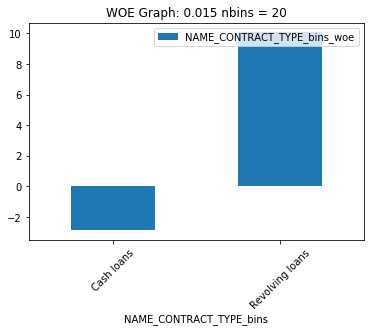

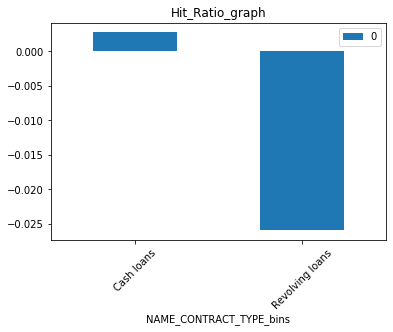

0.01499642042401189
___________
CODE_GENDER
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
      CODE_GENDER_bins  CODE_GENDER_bins_woe
1                    F             10.977752
0                    M            -15.110068
35657              XNA              0.005660


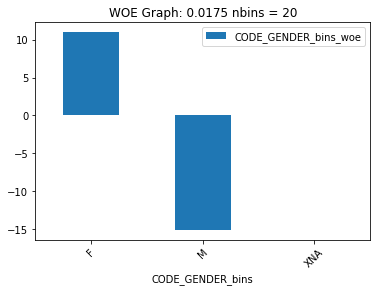

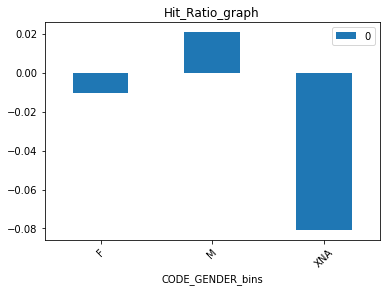

0.017479300211156405
____________
FLAG_OWN_CAR
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
  FLAG_OWN_CAR_bins  FLAG_OWN_CAR_bins_woe
0                 N              -4.104984
2                 Y               6.620525


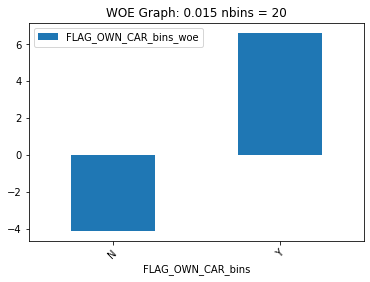

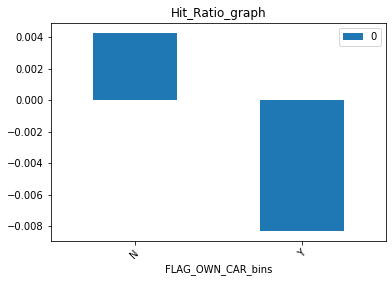

0.014996603815588441
_______________
FLAG_OWN_REALTY
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
  FLAG_OWN_REALTY_bins  FLAG_OWN_REALTY_bins_woe
1                    N                 -1.855605
0                    Y                  1.107619


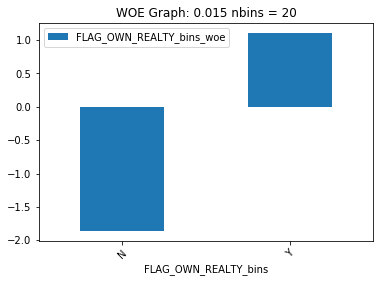

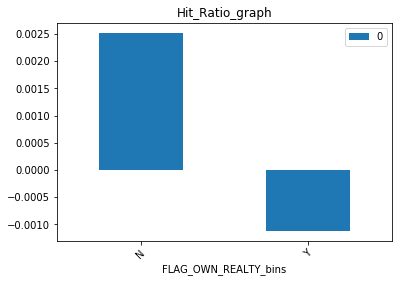

0.014999743092632672
_______________
NAME_TYPE_SUITE
    NAME_TYPE_SUITE_bins  NAME_TYPE_SUITE_bins_woe
8               Children                  0.382966
1                 Family                  2.703908
416      Group of people                 -0.019604
64                    NA                  0.592766
18               Other_A                 -0.105488
174              Other_B                 -0.531830
5        Spouse, partner                  0.349981
0          Unaccompanied                 -1.128410


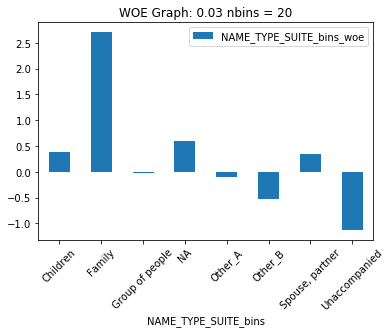

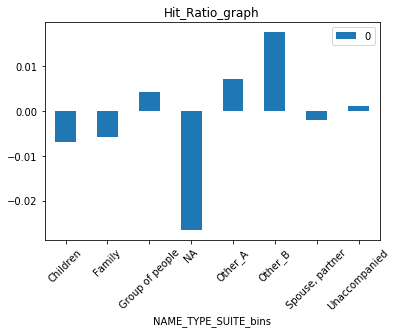

0.02999963812540396
________________
NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64
      NAME_INCOME_TYPE_bins  NAME_INCOME_TYPE_bins_woe
29666           Businessman                   0.014149
6      Commercial associate                   3.888199
48949       Maternity leave                  -0.027975
8                 Pensioner                  16.219194
1             State servant                   7.083366
10277               Student                   0.025467
1156             Unemployed                  -0.109011
0                   Working                 -13.027848


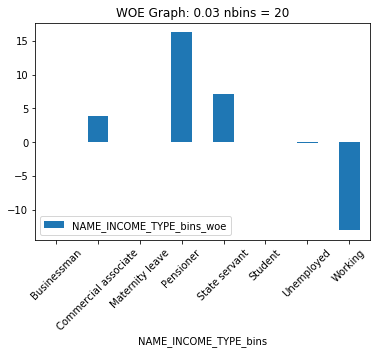

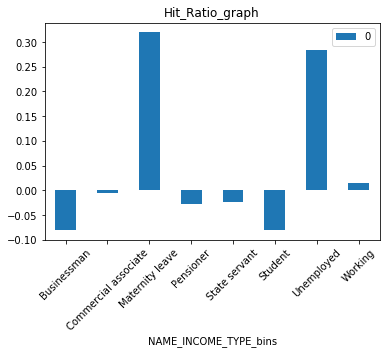

0.02997785068034169
___________________
NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64
           NAME_EDUCATION_TYPE_bins  NAME_EDUCATION_TYPE_bins_woe
2141                Academic degree                      0.179229
1                  Higher education                     19.611268
61                Incomplete higher                     -0.652981
495                 Lower secondary                     -1.805437
0     Secondary / secondary special                     -8.344164


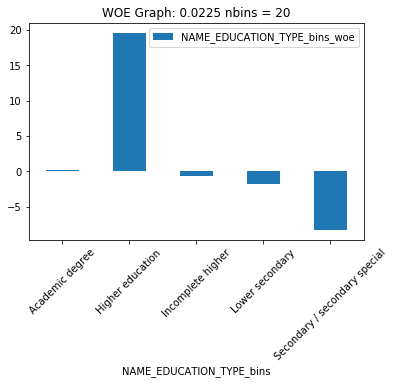

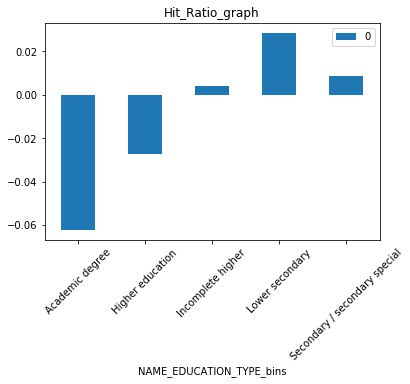

0.022479587426912303
__________________
NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64
      NAME_FAMILY_STATUS_bins  NAME_FAMILY_STATUS_bins_woe
3              Civil marriage                    -6.841923
1                     Married                     5.075158
58                  Separated                    -0.334026
0        Single / not married                    -8.384368
41982                 Unknown                     0.002830
18                      Widow                     5.362782


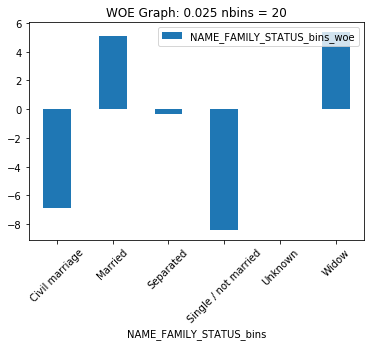

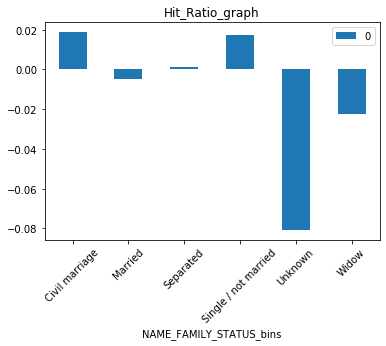

0.024993615522097803
_________________
NAME_HOUSING_TYPE
House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64
    NAME_HOUSING_TYPE_bins  NAME_HOUSING_TYPE_bins_woe
223        Co-op apartment                    0.027260
0        House / apartment                    2.950163
56     Municipal apartment                   -0.796243
159       Office apartment                    0.667476
15        Rented apartment                   -3.363251
29            With parents                   -7.654154


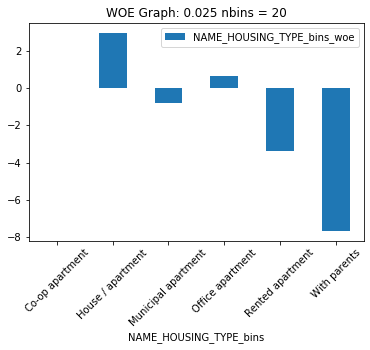

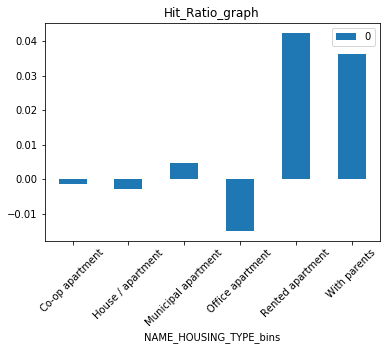

0.0249974027830598
_______________
OCCUPATION_TYPE
      OCCUPATION_TYPE_bins  OCCUPATION_TYPE_bins_woe
6              Accountants                  5.051693
25          Cleaning staff                 -1.173754
26           Cooking staff                 -2.272020
1               Core staff                  6.464535
13                 Drivers                 -8.250460
753               HR staff                  0.164553
86   High skill tech staff                  3.370986
416               IT staff                  0.147427
0                 Laborers                -13.341867
95      Low-skill Laborers                 -3.199386
7                 Managers                  5.577239
47          Medicine staff                  1.863148
8                       NA                 12.311158
31   Private service staff                  0.664209
111          Realty agents                  0.028251
21             Sales staff                 -6.033164
114            Secretaries                  0.23

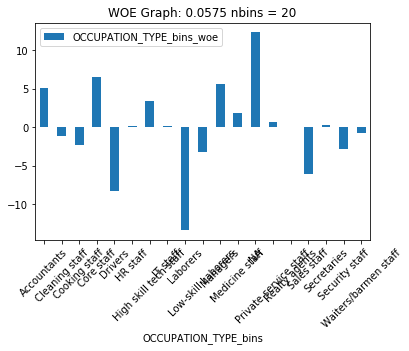

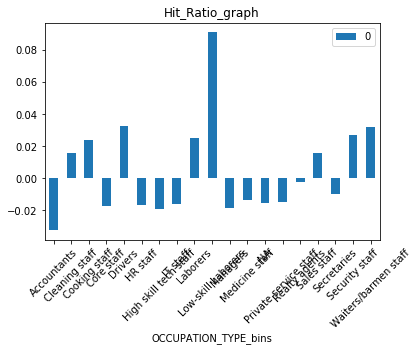

0.057480106555383284
__________________________
WEEKDAY_APPR_PROCESS_START
TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64
   WEEKDAY_APPR_PROCESS_START_bins  WEEKDAY_APPR_PROCESS_START_bins_woe
11                          FRIDAY                            -0.394148
1                           MONDAY                             1.702730
10                        SATURDAY                             0.767080
6                           SUNDAY                             0.337472
4                         THURSDAY                            -0.146303
29                         TUESDAY                            -1.531921
0                        WEDNESDAY                            -0.474293


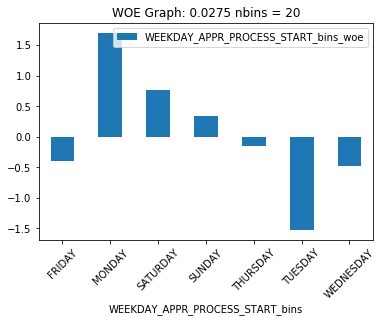

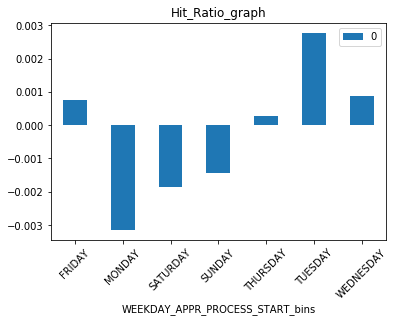

0.02749978232001502
_________________
ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University      

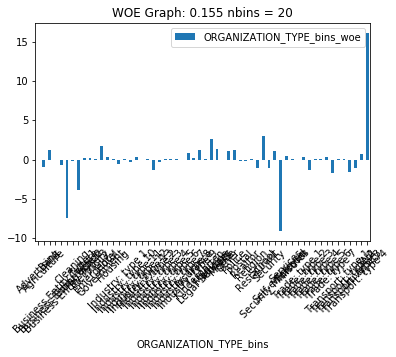

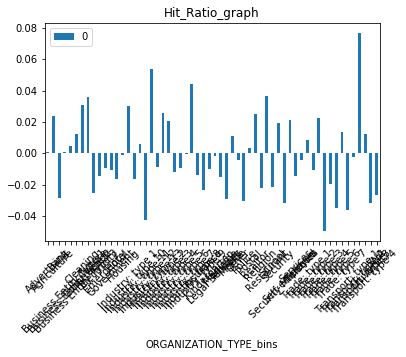

0.15498498457054988
__________________
FONDKAPREMONT_MODE
    FONDKAPREMONT_MODE_bins  FONDKAPREMONT_MODE_bins_woe
2                        NA                    -5.269587
202           not specified                     0.492340
23         org spec account                     2.086291
0          reg oper account                     7.455528
43    reg oper spec account                     2.807957


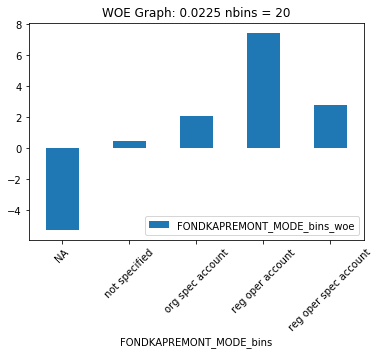

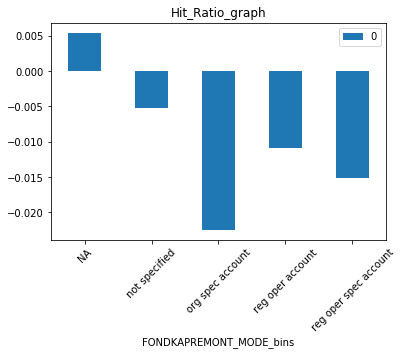

0.022495300957119737
______________
HOUSETYPE_MODE
    HOUSETYPE_MODE_bins  HOUSETYPE_MODE_bins_woe
2                    NA                -9.325882
0        block of flats                10.528054
349    specific housing                -0.531568
207      terraced house                -0.088949


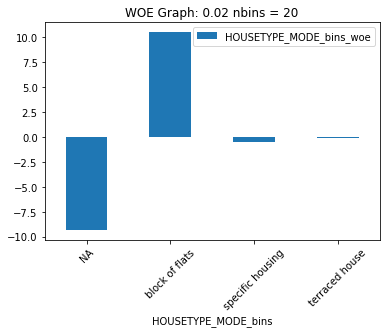

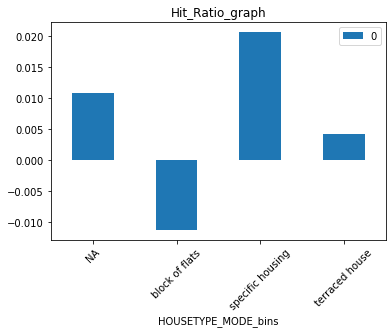

0.019987794601351954
__________________
WALLSMATERIAL_MODE
    WALLSMATERIAL_MODE_bins  WALLSMATERIAL_MODE_bins_woe
1                     Block                     1.527034
23                    Mixed                     0.210434
116              Monolithic                     1.025714
2                        NA                    -9.172223
30                   Others                    -0.065478
13                    Panel                    11.260675
0              Stone, brick                     4.185250
26                   Wooden                    -1.419186


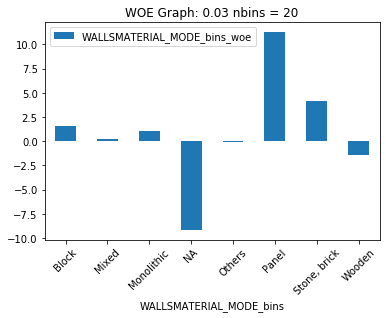

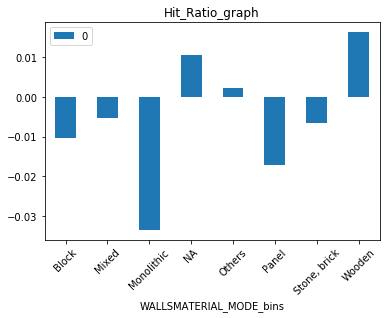

0.02998900771149376
___________________
EMERGENCYSTATE_MODE
   EMERGENCYSTATE_MODE_bins  EMERGENCYSTATE_MODE_bins_woe
2                        NA                    -10.046618
0                        No                     10.526684
26                      Yes                     -0.595032


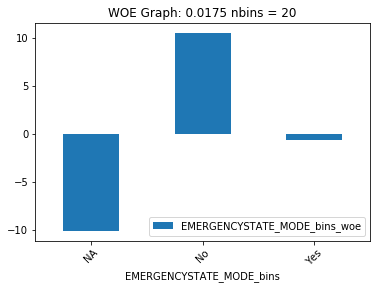

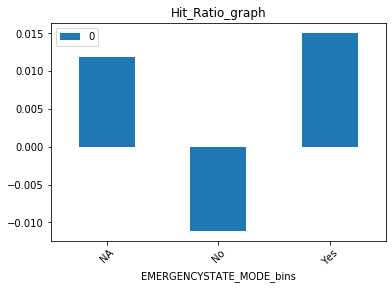

0.017486852837086706


In [22]:
woe_df_cat = pd.DataFrame()
IVs_dict_cat = {}
for i in df_cat.columns:
    if i != 'TARGET':
        print ('_'*len(i))
        print (i)
        woe_df_cat[i] ,IVs = woe_transform(i, 'TARGET', df_cat, 20, 0.25, 'NA')
        IVs_dict_cat.update({i:IVs})

In [23]:

woe_df_cont.shape

(307511, 63)

In [24]:

woe_df_cat.shape

(307511, 16)

In [25]:
woe_features = woe_df_cont.merge(woe_df_cat,left_index = True,right_index = True)
woe_features = woe_features[woe_features.columns[~(woe_features.iloc[0] == 'error, please check feature')]] 

In [26]:

woe_features['TARGET']=df['TARGET']

In [27]:

woe_features.shape

(307511, 78)

In [28]:
woe_features.head(5)

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,TARGET
0,0.531195,0.263231,-4.391120,-4.751423,-0.117069,-6.882975,-7.350332,-1.797763,-1.785208,-4.103033,...,-8.384368,2.950163,-13.341867,-0.474293,-7.517330,7.455528,10.528054,4.185250,10.526684,1
1,0.531195,2.773969,5.004089,5.630460,-2.584039,0.864408,-4.519243,-1.550476,-5.120159,-4.103033,...,5.075158,2.950163,6.464535,1.702730,3.054013,7.455528,10.528054,1.527034,10.526684,0
2,0.531195,0.547415,4.748899,4.860071,-0.157635,2.978479,-6.902121,-0.977043,-2.193839,-1.177413,...,-8.384368,2.950163,-13.341867,1.702730,1.771590,-5.269587,-9.325882,-9.172223,-10.046618,0
3,0.531195,-1.132170,-4.246980,-2.210146,-2.236085,2.978479,2.082214,4.593939,-2.193839,-4.103033,...,-6.841923,2.950163,-13.341867,-0.474293,-7.517330,-5.269587,-9.325882,-9.172223,-10.046618,0
4,0.531195,-1.621059,-1.817737,1.191005,2.435104,4.944773,2.082214,-0.977043,0.572973,-4.103033,...,-8.384368,2.950163,6.464535,-0.146303,0.032604,-5.269587,-9.325882,-9.172223,-10.046618,0


In [29]:

unstacked_corr = woe_features.corr().unstack()
unstacked_corr = unstacked_corr[unstacked_corr < 1]
unstacked_corr = unstacked_corr[unstacked_corr > 0.7]
unstacked_corr.shape


(1522,)

### standard scaling

In [30]:


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(woe_features)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [31]:

woe_features_std = scaler.transform(woe_features)

In [32]:
woe_features_std = pd.DataFrame(woe_features_std,columns = woe_features.columns)

In [33]:
woe_features_std

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,TARGET
0,1.331276,0.274274,-1.148240,-0.476002,-0.034072,-1.447682,-1.216240,-0.670043,-0.557875,-0.675950,...,-1.812915,0.316693,-1.541054,-0.415090,-0.922787,1.663942,1.017710,0.650379,0.960698,3.374485
1,1.331276,1.529896,1.309771,0.879808,-0.753129,0.158946,-0.843154,-0.579468,-1.573620,-0.675950,...,0.631129,0.316693,0.515649,1.735991,0.332771,1.663942,1.017710,0.337163,0.960698,-0.296342
2,1.331276,0.416394,1.243008,0.779200,-0.045896,0.597355,-1.157174,-0.369433,-0.682334,0.487893,...,-1.812915,0.316693,-1.541054,1.735991,0.180458,-0.659874,-0.991256,-0.923521,-1.048813,-0.296342
3,1.331276,-0.423567,-1.110529,-0.144127,-0.651709,0.597355,0.026800,1.671088,-0.682334,-0.675950,...,-1.532831,0.316693,-1.541054,-0.415090,-0.922787,-0.659874,-0.991256,-0.923521,-1.048813,-0.296342
4,1.331276,-0.668061,-0.474981,0.300043,0.709819,1.005119,0.026800,-0.369433,0.160370,-0.675950,...,-1.812915,0.316693,0.515649,-0.091009,-0.026082,-0.659874,-0.991256,-0.923521,-1.048813,-0.296342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.963341,-1.026710,0.202145,-0.285348,1.639245,-1.754031,-1.157174,0.728737,-0.703960,-0.675950,...,-0.351096,-3.998285,-0.782116,-0.091009,0.017346,1.663942,1.017710,0.650379,0.960698,-0.296342
307507,0.963341,-0.453761,0.426792,-0.285348,-0.366291,1.202908,1.573670,-0.369433,0.568280,-0.675950,...,0.683358,0.316693,1.122765,1.735991,1.886450,1.663942,1.017710,0.650379,0.960698,-0.296342
307508,0.963341,-1.026710,0.234723,0.303608,0.105269,-0.017584,0.925796,0.208582,1.223323,-0.675950,...,-0.351096,0.316693,0.423512,-0.091009,0.332771,1.663942,1.017710,1.484070,0.960698,-0.296342
307509,0.963341,-0.525746,-1.148240,-0.476002,0.105269,-0.831188,0.496155,-0.556698,-1.376536,-0.675950,...,0.631129,0.316693,-1.541054,-0.415090,-0.037521,-0.659874,1.017710,0.650379,0.960698,3.374485


###  Random Forest to select features

- This is a high dimensional dataset, we need to decrease the complexity of the model
- Use RF to select features by feature importance to increase the model performance

Feature ranking:
1. feature 12 (0.048665)
2. feature 13 (0.045495)
3. feature 4 (0.033773)
4. feature 0 (0.033765)
5. feature 8 (0.033750)
6. feature 2 (0.033615)
7. feature 7 (0.033514)
8. feature 5 (0.033467)
9. feature 1 (0.032995)
10. feature 10 (0.032951)
11. feature 3 (0.032843)
12. feature 71 (0.030997)
13. feature 6 (0.030859)
14. feature 11 (0.028767)
15. feature 72 (0.028310)
16. feature 70 (0.026608)
17. feature 60 (0.023720)
18. feature 68 (0.021785)
19. feature 58 (0.017924)
20. feature 57 (0.017896)
21. feature 64 (0.017339)
22. feature 65 (0.016561)
23. feature 9 (0.016264)
24. feature 66 (0.015791)
25. feature 69 (0.013796)
26. feature 67 (0.012348)
27. feature 62 (0.011923)
28. feature 63 (0.009784)
29. feature 59 (0.009097)
30. feature 56 (0.008050)
31. feature 44 (0.007485)
32. feature 30 (0.007450)
33. feature 16 (0.007338)
34. feature 39 (0.007129)
35. feature 28 (0.006996)
36. feature 25 (0.006989)
37. feature 53 (0.006860)
38. feature 42 (0.006617)
39. feature 75

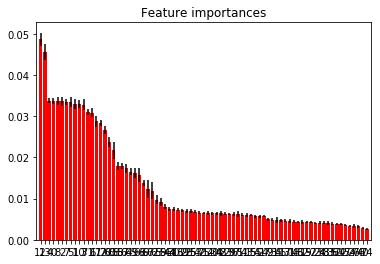

In [34]:
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=16,
                              random_state=123)
X=woe_features_std.drop(['TARGET'],axis=1).values
y=df.TARGET.values
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [35]:
importances_df = pd.DataFrame({'features':woe_features.drop(['TARGET'],axis=1).columns,'importance':importances}).sort_values('importance',ascending=False)



## Select top 21 features to build Models

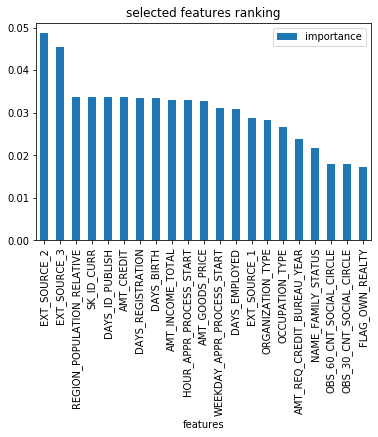

In [36]:
importances_df.head(21).set_index('features').sort_values('importance',ascending=False).plot(kind='bar',title='selected features ranking')



## Modelling (Combined with SMOTE)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [38]:
x= woe_features.iloc[:,[12,13,8,0,4,5,7,2,1,3,10,6,71,11,72,70,60,68,57,58,64]].values
y=df['TARGET'].values 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Apply Symthetic Minority Over-sampling  Technique (SMOTE) for imbalanced dataset

- It creates new synthetic default samples

In [41]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [42]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


Before OverSampling, counts of label '1': 19876
Before OverSampling, counts of label '0': 226132 



In [43]:

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

After OverSampling, counts of label '1': 226132
After OverSampling, counts of label '0': 226132


### OK, we made the ratio of label 1 in training set from 8%-50%


## Evaluation Metrics

- False Positive : It 's not necessary for detecting non-default. We care about the accuracy of detecting default. So we need to make Recall as high as possible and don't scarfice too much precision.
- AUC: AUC measures the ability of seperability. It tells us how the model is capable to distinguish each class. But in this case, AUC can't be pretty near to 1, we need to scarfice Precisions in order to increase Recall then it lower the AUC.
- Overall, we should make the Recall higher and meanwhile maintain the AUC not decreasing too much.

### Logistic Regression

In [96]:
#LR
clf = LogisticRegression(random_state=123)
clf.fit(X_train_res, y_train_res)

p_pred_test = clf.predict_proba(X_test)[:,1]

threshold=pd.Series(p_pred_test).quantile(0.6)
y_pred_test =[1 if i > threshold else 0 for i in p_pred_test]
 


from sklearn.metrics import f1_score
from sklearn import metrics
fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(y_test,p_pred_test)
f1_score(y_test,y_pred_test),metrics.auc(fpr_lr, tpr_lr)



(0.2393231810490694, 0.734383861763364)

In [97]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.63      0.76     56554
           1       0.14      0.71      0.24      4949

    accuracy                           0.63     61503
   macro avg       0.55      0.67      0.50     61503
weighted avg       0.90      0.63      0.72     61503



#### LR is not bad, recall is 0.71 which means 71% of positive cases are predicted as dfefault and AUC is 0.73, so it's a good classifier.

### Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
RFmodel = RandomForestClassifier(n_estimators=16,random_state=42)
RFmodel.fit(X_train_res, y_train_res)
rf_p_pred_test=RFmodel.predict_proba(X_test)[:,1]

threshold2=pd.Series(rf_p_pred_test).quantile(0.5)
rf_y_pred_test = [1 if i > threshold2 else 0 for i in rf_p_pred_test]

fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(y_test,rf_p_pred_test)
f1_score(y_test,rf_y_pred_test),metrics.auc(fpr_rf, tpr_rf)

(0.22164169966121067, 0.6646884761326859)

In [47]:
#from sklearn.metrics import classification_report
print(classification_report(y_test,rf_y_pred_test )) 

              precision    recall  f1-score   support

           0       0.95      0.70      0.81     56554
           1       0.14      0.55      0.22      4949

    accuracy                           0.69     61503
   macro avg       0.54      0.63      0.51     61503
weighted avg       0.88      0.69      0.76     61503



#### RF performs not good, recall is 0.55 which means we still have half of defalut cases are not predicted as defalut

### XGBOOST

In [50]:
from xgboost import XGBClassifier
parameters = { 'colsample_bynode':1, 'colsample_bytree':1,'gamma':0,
               'learning_rate':0.01, 'max_depth':3,
               'min_child_weight':1, 'n_estimators':100, 'n_jobs':-1,
               'objective':'binary:logistic', 'random_state':7,
               'reg_alpha':0, 'reg_lambda':1.2, 'scale_pos_weight':9, 
               'subsample':1}
#updater = {'max_depth':2,'min_child_weight':4,'colsample_bytree': 0.6, 'subsample': 0.9,'gamma':0.3,'reg_alpha':0.05,'leanring_rate':0.1}
#parameters.update(updater)

#split data into test and train
seed = 7
test_size = 0.33
model=XGBClassifier(**parameters)
#fit model
model.fit(X_train_res, y_train_res)


xgb_p_pred_test = model.predict_proba(X_test)[:,1]

threshold3 = pd.Series(xgb_p_pred_test).quantile(0.5)

xgb_y_pred_test = [1 if i>threshold else 0 for i in xgb_p_pred_test]



In [51]:
print(classification_report(y_test, xgb_y_pred_test)) 


              precision    recall  f1-score   support

           0       1.00      0.00      0.00     56554
           1       0.08      1.00      0.15      4949

    accuracy                           0.08     61503
   macro avg       0.54      0.50      0.07     61503
weighted avg       0.93      0.08      0.01     61503



In [52]:
from sklearn.metrics import f1_score
from sklearn import metrics
fpr_xgb, tpr_xgb, thresholds_xgb = metrics.roc_curve(y_test,xgb_p_pred_test)
f1_score(y_test,xgb_y_pred_test),metrics.auc(fpr_xgb, tpr_xgb)

(0.14897427793079573, 0.6405180776873146)

#### Recall is 1, it means we sucessfully predict all default cases as default, but the accuracy and AUC are quite low

## We can apply Bayes Optimization to tune parameters

### bayes_opt

In [65]:
from bayes_opt import BayesianOptimization
import xgboost as xgb


#Converting the dataframe into XGBoost’s Dmatrix object
dtrain = xgb.DMatrix(X_train_res, label=y_train_res)

#Bayesian Optimization function for xgboost
#specify the parameters you want to tune as keyword arguments
def xgb_evaluate(max_depth, gamma, colsample_bytree):
    params = {'eval_metric': 'rmse',
              'max_depth': int(max_depth),
              'subsample': 0.8,
              'eta': 0.1,
              'gamma': gamma,
              'eval_metric': 'auc',
              'colsample_bytree': colsample_bytree}

    cv_result = xgb.cv(params, dtrain, num_boost_round=100, nfold=3) #Cross validating with the specified parameters in 3 folds and 100 iterations
    
    return cv_result['train-auc-mean'].iloc[-1] #cv_result['train-auc-mean'].iloc[-1]


xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (3, 7), 
                                             'gamma': (0, 1),
                                             'colsample_bytree': (0.3, 0.9)})

#performing Bayesian optimization for 3 iterations with 5 steps of random exploration with an acquisition function of expected improvement
xgb_bo.maximize(n_iter=3, init_points=5, acq='ei')



|   iter    |  target   | colsam... |   gamma   | max_depth |
-------------------------------------------------------------
|  1        |  0.9751   |  0.7716   |  0.4437   |  5.854    |
|  2        |  0.9762   |  0.3854   |  0.07126  |  6.714    |
|  3        |  0.976    |  0.6587   |  0.9111   |  6.782    |
|  4        |  0.9739   |  0.4695   |  0.08775  |  4.851    |
|  5        |  0.9742   |  0.5975   |  0.3916   |  4.284    |
|  6        |  0.9756   |  0.3086   |  0.9877   |  6.964    |
|  7        |  0.977    |  0.8712   |  0.005471 |  6.942    |
|  8        |  0.9769   |  0.8834   |  0.02286  |  6.999    |


In [81]:
#Extracting the best parameters
params = xgb_bo.max['params']
print(params)



{'colsample_bytree': 0.8712143549887807, 'gamma': 0.005471338042498997, 'max_depth': 6.942001545821572}


In [82]:
#Converting the max_depth and n_estimator values from float to int
params['max_depth']= int(params['max_depth'])



In [83]:
updater={'reg_alpha':0.05,'scoring':'auc','n_estimators':500,'learning_rate':0.1,'scale_pos_weight':9,'subsample': 0.9,'min_child_weight':4}
params=params.update(updater)

In [84]:
#Initialize an XGBClassifier with the tuned parameters and fit the training data
from xgboost import XGBClassifier
classifier2 = XGBClassifier(params).fit(X_train_res, y_train_res)


In [85]:
bayes_pred_test_y = classifier2.predict_proba(X_test)[:,1]

In [98]:
threshold4 =pd.Series(bayes_pred_test_y).quantile(0.48)
y_pred_test_bayes_opt = [1 if i >threshold4 else 0 for i in bayes_pred_test_y]

In [99]:
#Looking at the classification report
print(classification_report(y_test,y_pred_test_bayes_opt ))

              precision    recall  f1-score   support

           0       0.96      0.50      0.66     56554
           1       0.12      0.78      0.21      4949

    accuracy                           0.53     61503
   macro avg       0.54      0.64      0.43     61503
weighted avg       0.90      0.53      0.62     61503



In [100]:
from sklearn.metrics import f1_score
from sklearn import metrics
bayes_fpr, bayes_tpr, bayes_thresholds = metrics.roc_curve(y_test,bayes_pred_test_y)
f1_score(y_test,y_pred_test_bayes_opt),metrics.auc(bayes_fpr, bayes_tpr)

(0.2090384771601094, 0.7127986306955411)

### As we can see, after we tuned the parameters, Recall is 0.78 and AUC is 0.712 (from 0.64 to 0.712, increased 10%), although, it's not perfect, but we cannot make everything perfect, this is the most balanced result so far.

### So XGBoost performs best for this case
